In [ ]:
import pandas as pd
import numpy as np
import itertools
import random
import copy

In [ ]:
def initializing_ants():
  keys=[1,2,3]

  ants={}
  for i in keys:
      ants[i] =None
  return ants

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


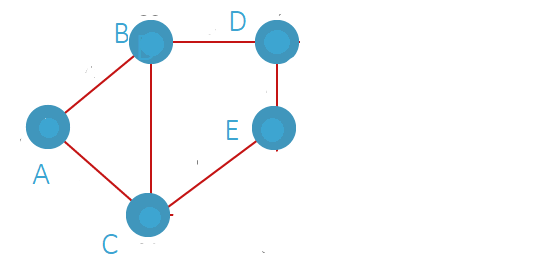

In [ ]:
import cv2
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread("/content/drive/MyDrive/hi.png", 1)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
path={'A':['B','C'],
      'B':['D','C','A'],
      'C':['B','E','A'],
      'D':['B','E'],
      'E':['D','C']}
      #'F':['E','C','H'],
      #'G':['D','I','H'],
      #'H':['G','D','F','I'],
      #'I':['G','H']}
length={('A','B'):1,
        ('A','A'):0,
        ('A','C'):1,
        ('A','D'):2,
        ('A','E'):2,
        ('B','A'):1,
        ('B','B'):0,
        ('B','C'):1,
        ('B','D'):2,
        ('B','E'):2,
        ('C','B'):1,
        ('C','C'):0,
        ('C','A'):1,
        ('C','D'):2,
        ('C','E'):2,
        ('D','B'):1,
        ('D','D'):0,
        ('D','C'):2,
        ('D','A'):2,
        ('D','E'):1,
        ('E','A'):2,
        ('E','E'):0,
        ('E','B'):2,
        ('E','C'):2,
        ('E','D'):1,
        
        }

In [ ]:


# random integer from 0 to 9
def initializing_pheremone(path): 
  lo=[]
  lp=[]
  ji=list(path.keys())
  for pair in itertools.product(ji,ji):
    lo.append(pair)
  for tup in lo:
    if len(set(tup))>1:
      lp.append(tup)
  
  
  #for key, value in path.items():

   # for j in value:
    #  lo.append((key,j))
  pheremone = dict.fromkeys(lp , 0)
  
  for key, value in pheremone.items():
  #print(key,value)
    pheremone[key]=round(random.uniform(0.1, 10.0),2)
  return pheremone


In [ ]:
def ants_at_initial(ants,source):
  for key, value in ants.items():
    k=[source]
    ants[key]=k
  return ants

In [ ]:
def probability(pheremone,current_pos,path,not_visited,length):
  #print('Im new')
  #print(not_visited)
 # print('hello')
  alpha=1
  beta=1
  q=0.5
  potential_next=[]
  probability=[]
  sumt=0
  #for key,value in path.items():
  for i in not_visited:
    #print(current_pos,i)
    sumt+=((q/length[(current_pos,i)])**alpha)*(1/length[(current_pos,i)])**beta
  
  for i in not_visited:
    potential_next.append(i)
    Tij=(q/length[(current_pos,i)])**alpha
    Nij=(1/length[(current_pos,i)])**beta
    probability.append((Tij*Nij)/sumt)
  #print(probability)
  #print('potential')
  #print(potential_next)
  p=np.array(probability)
  max_list=np.argmax(p)
  return potential_next[max_list]


 # for key,value in path.items():
  #  if key==current_pos:
   #   for i in value:
    #    potential_next.append(i)
     #   Tij=(q/length[(key,i)])**alpha
      #  Nij=(1/length[(key,i)])**beta
       # probability.append((Tij*Nij)/sumt)


In [ ]:
def pheremone_local_updation(pheremone,length,i,j):
  q=0.5
  Tij=(pheremone[(i,j)])+q/length[(i,j)]
  pheremone[(i,j)]=pheremone[(i,j)]+Tij
  return pheremone

def pheremone_global_updation(pheremone, length,i,j):
  gamma=0.4
  q=0.5
  Tij=(pheremone[(i,j)])+q/length[(i,j)]
  Tij=(1-gamma)*Tij
  pheremone[(i,j)]=Tij
  return pheremone



In [ ]:
def ACO(ants,path,pheremone,iterations,length):
  shortest_path_length=50
  source='A'
  destination='D'
  shortest_trip=None
  for i in range(0,iterations):
    for key, value in ants.items():
      source='A'
      #print('ant')
      current_pos=source
      f=random.randint(0, len(path[current_pos])-1)
      #print(f)
      ll=path[current_pos]
      #print(ll)
      current_pos=ll[f]
      not_visited=[]
      
      #for i in path.keys():
        #if current_pos!=i:
          #not_visited.append(i)
      #print(path[current_pos])
      not_visited=copy.deepcopy(path[current_pos])
     # print(path)
      #not_visited=[i if current_pos!=i else j=j for i,j in path.keys()]
      #print(not_visited)
      while(current_pos!=destination or not_visited):
       # print('selected')
        #print(current_pos)
        p_max=probability(pheremone,current_pos,path,not_visited,length)
       # print('ok')
        #print(path)
        pheremone=pheremone_local_updation(pheremone,length,current_pos,p_max)
       # print('ok1')
        #print(path)
        ants[key].append(p_max)
      #  print('ok2')
        not_visited.remove(p_max)
       # print(ants[key])
        for i in path[p_max]:
          if i not in not_visited and i not in ants[key]:
            not_visited.append(i)
        for i in not_visited:
          if i in ants[key]:
            not_visited.remove(i)
           # print('ok3')
        #print(path)
      #  print('alright')
       # print(not_visited)
       # print('max is')
       # print(p_max)
        current_pos=p_max
        if p_max==destination:
          break
    lengths=[]
    
    for key,value in ants.items():
      l=0
      for i in range(len(value)-1):
        l+=length[(value[i],value[i+1])]
      lengths.append(l)
    lengths1=np.array(lengths)
    min_length=np.argmin(lengths1)
    if np.amin(lengths1)<shortest_path_length:
      shortest_path_length=np.amin(lengths1)-1
     # print('yahoo')
     # print(min_length)
      #print('great')
      #print(ants)
      shortest_trip=ants[min_length+1]
      print('Shortest path:')
      print(shortest_trip)
      print('Shortest length:')
      print(shortest_path_length)
    for key,value in pheremone.items():
      pheremone=pheremone_global_updation(pheremone,length,key[0],key[1])
    for key,value in ants.items():
      ants[key]=[]
    return shortest_path_length,shortest_trip


In [ ]:
ants=initializing_ants()
pheremone=initializing_pheremone(path)
ants=ants_at_initial(ants,'A')
iterations=4
a,b=ACO(ants,path,pheremone,iterations,length)
print(a,b)

Shortest path:
['A', 'C', 'B', 'D']
Shortest length:
3
3 ['A', 'C', 'B', 'D']
